In [14]:
import pandas as pd
import os
import time

import dask
import dask.dataframe as dd

from dask.distributed import Client, progress
client = Client(n_workers=4, threads_per_worker=2, memory_limit='1GB')
client

#start = time.perf_counter()
def print_finish(start):
  finish = time.perf_counter()
  print('finished in '+str(round(finish-start, 5))+' seconds')
  return finish-start

In [15]:
# Lets get a big pandas frame and see how long it takes

file_path = '/Users/joaorochaemelo/Downloads/new-york-city-taxi-fare-prediction/test.csv'
df_all = pd.read_csv(file_path)
for i in range(0,20):
    df = pd.read_csv(file_path)
    df_all = pd.concat([df, df_all])


start = time.perf_counter()
print(df_all.shape)
print(df_all['passenger_count'].mean())
print_finish(start)

0.0012877730000582233

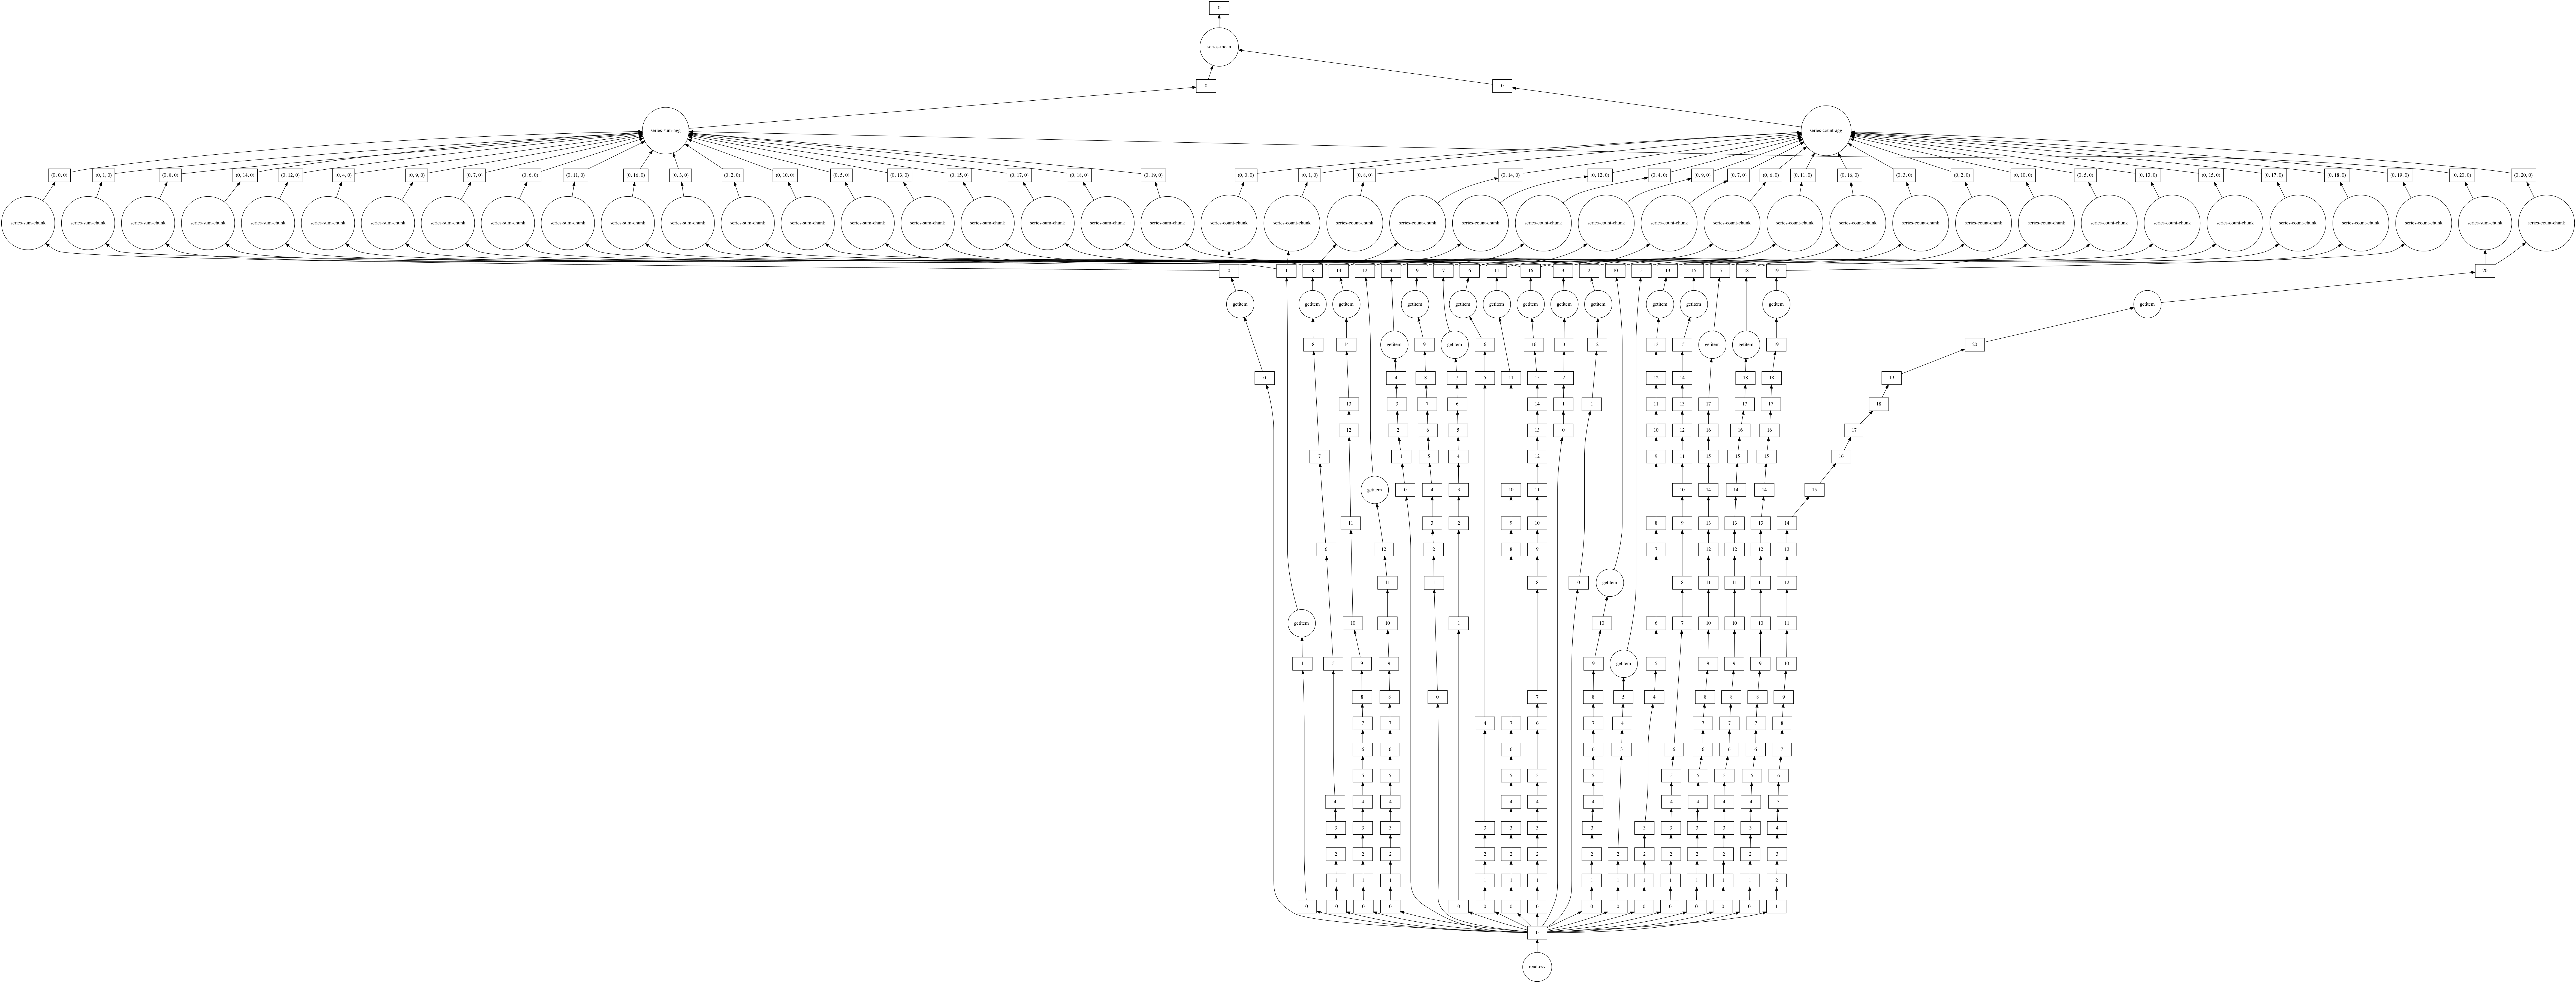

In [16]:
# Lets get a big Dask frame and see how long it takes

df_all = dd.read_csv(file_path)
for i in range(0,20):
    df = dd.read_csv(file_path)
    df_all = dd.concat([df, df_all])

start = time.perf_counter()
#print(df_all.shape)
#print(df_all['passenger_count'].mean().compute())
df_mean = df_all['passenger_count'].mean()
#print_finish(start)

df_mean.visualize(filename='mean.png')


In [17]:
from alive_progress import alive_bar
import time

df_all = pd.read_csv(file_path)
dd_all = dd.read_csv(file_path)

t_pandas = {}
t_dask = {}

def compute(l):
    for i in range(l):
        time.sleep(.1)  # process items
        yield  # insert this and you're done!
 
for key in [20, 25, 30, 40, 60, 90, 100, 200, 1000, 2000]:
    print(key)
    for i in range(0,key):
        with alive_bar(i) as bar:    
            for i in compute(i):
                bar()
                
        # Pandas
        df = pd.read_csv(file_path)
        df_all = pd.concat([df, df_all])

        # Dask
        dd_temp = dd.read_csv(file_path)
        dd_all = dd.concat([dd_temp, dd_all])


    start = time.perf_counter()
    df_all['passenger_count'].mean()
    print('pandas:')
    t_pandas[key] = print_finish(start)
   
    start = time.perf_counter()
    df_mean = df_all['passenger_count'].mean()
    print('dask:')
    t_dask[key] = print_finish(start)
    print('\n')

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(list(t_pandas.keys()), list(t_pandas.values()),\
         list(t_dask.keys()), list(t_dask.values()))
plt.legend(['pandas', 'dask'])
#plt.savefig('pandas_vs_dask.png')
plt.show()

In [3]:
from time import sleep
from tqdm.notebook import tqdm

for i in tqdm(range(10)):
    sleep(0.1)

print(1)


1
